Question 2:


### Self-Organizing Map (SOM) Process:

1. **Randomly initialise all weights**: We start by randomly initilizing all the weights£ of the neurons. Here, \( i \) and \( j \) denote the coordinates of the neuron in the grid. This random initialization serves as the starting point for the network.

2. **Select input vector ( x )**:
   For each training cycle, an input vector( x = [x_1, x_2, x_3, ... , x_n] ) is randomly chosen from the dataset.

3. **Compare ( x ) with weights ( w_j ) for each neuron ( j ) to determine a winner**: 
   The winning neuron  is the one whose weight vector is closest to the input vector, mathematically represented as:
   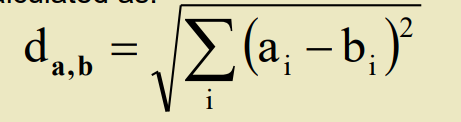

4. **Update winner so that it becomes a winner’s neighbours**: 
   The weights of the winning neuron and its neighboring neurons are updated to become more similar to the input vector. This is done using the formula:
   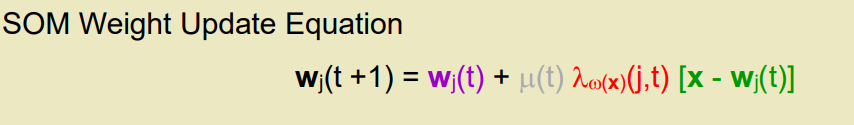
   
5. **Repeat from (2) until the map has converged (i.e. no noticeable changes in the weights) or pre-defined no. of training cycles have passed**:
   Continue selecting input vectors and adjusting the SOM until either the weights no longer change significantly or a predetermined number of training iterations have been reached.



Here is the SOM visualization of the 4x4 pixel blocks from the difference image of frame 1 and 2  of txt data file of Miss Universe from the website given in the EX5 .
The code follows the logic of the SOM algorithm described in the lecture 6.






In [33]:
#Importing the right libraries:

import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [34]:
#Loading data from the file :

data = np.loadtxt("C:\\Users\\Aaya_B\\Desktop\\AI\\artificial_intelligence\\Exercise_5\\data.txt")
labels=data



In [35]:
#SOM Training 

som = MiniSom(20, 20, 2, sigma=3, learning_rate=0.5)

som.train_random(data, 10000)


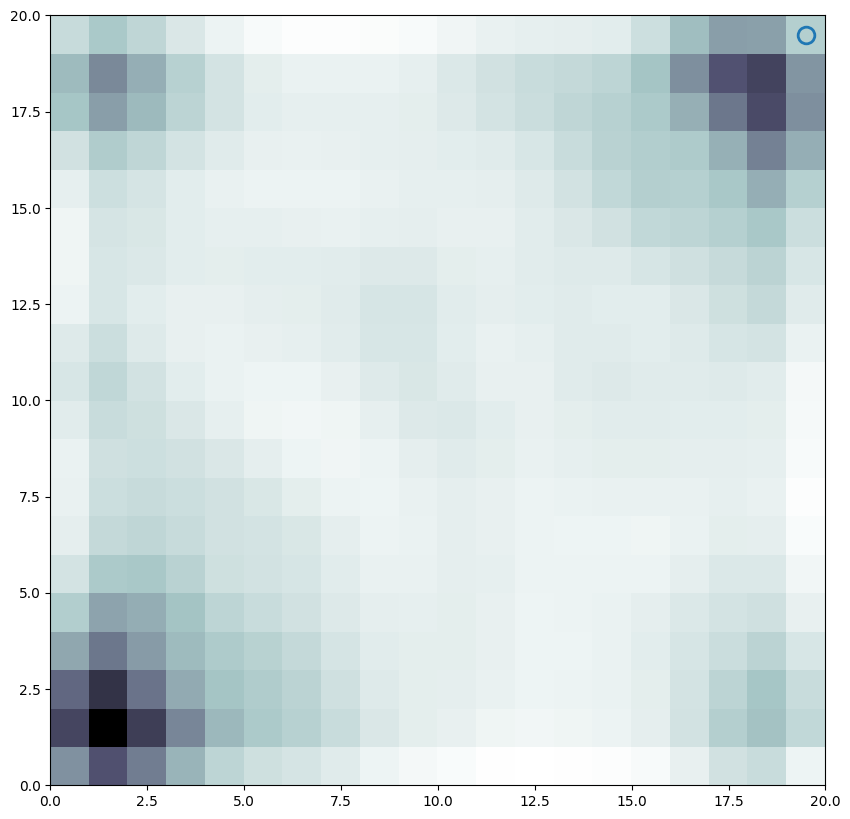

In [36]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
markers = ['o', 's', 'D', '^', 'v']
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

# Convert labels to integer, accounting for potential one-element arrays
labels = [int(label[0] if isinstance(label, np.ndarray) else label) for label in labels]

for idx, (x, y) in enumerate(data):
    w = som.winner((x, y))
    
    # Additional check to ensure label is valid index
    if 0 <= labels[idx] < len(markers):
        plt.plot(w[0]+.5, w[1]+.5, markers[labels[idx]], markerfacecolor='None',
                 markeredgecolor=colors[labels[idx]], markersize=12, markeredgewidth=2)

        
plt.axis([0, 20, 0, 20])
plt.show()
